## Metrics

In [40]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Будем использовать два вектора: вектор правильных ответов и вектор предсказанных величин (actual и predicted).
Actual состоит из нулей и единиц, а predicted - из величин из интервала [0, 1] (вероятности класса 1). 

Для финального предсказания (уже бинарного), нужно установить порог T: все объекты, имеющие предсказание выше порога, относят к классу 1, остальные - к классу 0. 

In [41]:
# рисует один scatter plot
def scatter(actual, predicted, T):
    plt.scatter(actual, predicted)       # точки на плоскости
    plt.xlabel("Labels")
    plt.ylabel("Predicted probabilities")
    
    plt.plot([-0.2, 1.2], [T, T])        # горизонтальная разделяющая линия
    plt.axis([-0.1, 1.1, -0.1, 1.1])     # задаем размер облати
    
    


In [42]:
actual_0 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  
          1.,  1.,  1., 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])
predicted_0 = np.array([ 0.19015288,  0.23872404,  0.42707312,  0.15308362,  0.2951875 ,
            0.23475641,  0.17882447,  0.36320878,  0.33505476,  0.202608  ,
            0.82044786,  0.69750253,  0.60272784,  0.9032949 ,  0.86949819,
            0.97368264,  0.97289232,  0.75356512,  0.65189193,  0.95237033,
            0.91529693,  0.8458463 ])

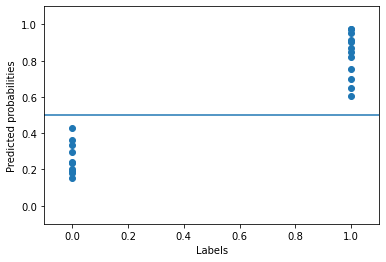

In [43]:
scatter(actual_0, predicted_0, 0.5)

Это идеальный алгоритм, он четко разделяет классы. 0 ниже линии уровня Т, 1 выше линии уровня.

In [44]:
actual_1 = np.array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
                    0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
                    1.,  1.,  1.,  1.])
predicted_1 = np.array([ 0.41310733,  0.43739138,  0.22346525,  0.46746017,  0.58251177,
            0.38989541,  0.43634826,  0.32329726,  0.01114812,  0.41623557,
            0.54875741,  0.48526472,  0.21747683,  0.05069586,  0.16438548,
            0.68721238,  0.72062154,  0.90268312,  0.46486043,  0.99656541,
            0.59919345,  0.53818659,  0.8037637 ,  0.272277  ,  0.87428626,
            0.79721372,  0.62506539,  0.63010277,  0.35276217,  0.56775664])

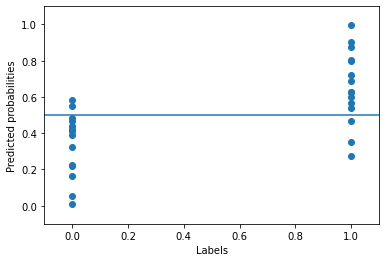

In [45]:
scatter(actual_1, predicted_1, 0.5)

 Это реальный хороший алгоритм. Здесь интервалы накладываются, нужно осторожно подбирать порог.

In [46]:
actual_2 = np.array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,
            0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])
predicted_2 = np.array([ 0.07058193,  0.57877375,  0.42453249,  0.56562439,  0.13372737,
            0.18696826,  0.09037209,  0.12609756,  0.14047683,  0.06210359,
            0.36812596,  0.22277266,  0.79974381,  0.94843878,  0.4742684 ,
            0.80825366,  0.83569563,  0.45621915,  0.79364286,  0.82181152,
            0.44531285,  0.65245348,  0.69884206,  0.69455127])

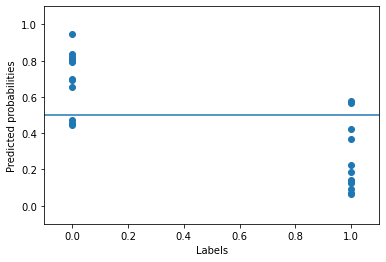

In [47]:
scatter(actual_2, predicted_2, 0.5)

Здесь неправильный алгоритм делает все наоборот: поднимает вероятности класса 0 выше вероятностей класса 1. Если так произошло, стоит посмотреть, не перепутались ли метки 0 и 1 при создании целевого вектора из сырых данных.


#### Precision и recall, accuracy

In [56]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [61]:
actual = np.array([ 1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
                0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
                1.,  1.,  1.])
predicted = np.array([ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
                0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,
                1.,  1.,  1.])

In [62]:
print(precision_score(actual, predicted))

0.9090909090909091


In [63]:
print(recall_score(actual, predicted))

0.7692307692307693


In [64]:
print(accuracy_score(actual, predicted))

0.8095238095238095


### Метрики, оценивающие векторы вероятностей класса 1

#### Log_loss

Log_loss вычисляет правдоподобие меток в actual с вероятностями из predicted, взятое с противоположным знаком:

$log\_loss(actual, predicted) = - \frac 1 n \sum_{i=1}^n (actual_i \cdot \log (predicted_i) + (1-actual_i) \cdot \log (1-predicted_i))$, $n$ - длина векторов.

Соответственно, эту метрику нужно минимизировать. 

Вычислим ее на наших векторах:

In [65]:
from sklearn.metrics import log_loss

In [66]:
print(log_loss(actual_1, predicted_1))

0.4645068222557676


#### ROC и AUC

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score